##  Imports

In [3]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

### Challenge 1: 

Get the Bitcoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.

Hint: start by creating a base_url for the Coingecko API, and then adding the parameters you want by looking at the documentation, which you can find here: https://www.coingecko.com/api/documentations/v3#

Specifically in this example, we are looking at: https://www.coingecko.com/api/documentations/v3#/coins/get_coins__id__market_chart

You want a coin (Bitcoin), vs USD, timeframe of 30 days.

For creating the DataFrame, you can print out all of the keys of your resulting json file, to see which ones you would like to extract as columns! The timestamp for these dataseries is in milliseconds - you can convert it to a convenient format using pd.to_datetime (look into how you can specify the unit here!)

In [5]:
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



dict_keys(['prices', 'market_caps', 'total_volumes'])


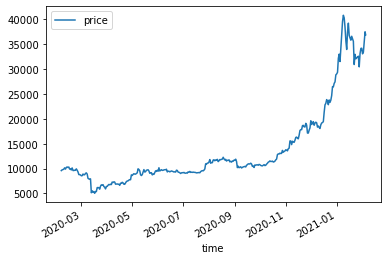

In [8]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart'
param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':365}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

# now create a dataframe and a plot!
results['prices']
df = pd.DataFrame(results['prices'], columns=['time', 'price'])
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.plot(x = 'time', y = 'price')
plt.show()

In [21]:
# Your code here: 
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart'
param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()


print(results.keys())

# now create a dataframe and a plot!
# pd.json_normalize(results["prices"])

df_prices = pd.DataFrame(results["prices"])
time_stamp = pd.to_datetime(df_prices[0], unit="ms")
df_market_caps = pd.DataFrame(results["market_caps"])
df_totalvolumns = pd.DataFrame(results["total_volumes"])



dict_keys(['prices', 'market_caps', 'total_volumes'])


In [9]:
import pandas as pd 
   
# create a new data frame 
df = pd.DataFrame({'Name': ['John Larter', 'Robert Junior', 'Jonny Depp'], 
                    'Age':[32, 34, 36]}) 
   
print("Given Dataframe is :\n",df) 
   
# Adding two new columns to the existing dataframe. 
# bydefault splitting is done on the basis of single space. 
df[['First','Last']] = df.Name.str.split(expand=True) 
   
print("\n After adding two new columns : \n", df) 

Given Dataframe is :
             Name  Age
0    John Larter   32
1  Robert Junior   34
2     Jonny Depp   36

 After adding two new columns : 
             Name  Age   First    Last
0    John Larter   32    John  Larter
1  Robert Junior   34  Robert  Junior
2     Jonny Depp   36   Jonny    Depp


In [9]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart'
param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()

df_prices = pd.DataFrame(data = results["prices"], columns=["Timestamp", "Price in USD"] )

print(df_prices)
#df_results = pd.DataFrame(results)
#print(df_results)


         Timestamp  Price in USD
0    1599728832324  10267.964512
1    1599732226523  10280.293017
2    1599735793179  10269.705220
3    1599739414542  10298.655732
4    1599742956891  10369.144124
..             ...           ...
716  1602306720999  11388.731624
717  1602309711406  11368.048444
718  1602313485469  11355.234527
719  1602316932123  11377.283116
720  1602320741000  11379.655117

[721 rows x 2 columns]


In [48]:
colnames = ["timestamp", "prices", "market_caps", "total_volumes" ]
df = pd.concat([time_stamp, df_prices[1], df_market_caps[1], df_totalvolumns[1]], axis=1)
df.columns = colnames
df

,timestamp,prices,market_caps,total_volumes
0,2020-09-08 19:04:49.351,9978.866934,1.845693e+11,4.595180e+10
1,2020-09-08 20:09:12.369,10035.487962,1.848802e+11,4.637075e+10
2,2020-09-08 21:07:00.045,10004.316334,1.853500e+11,4.634483e+10
3,2020-09-08 22:02:13.874,10035.279584,1.848613e+11,4.665163e+10
4,2020-09-08 23:04:18.405,10113.466232,1.859120e+11,4.771341e+10
...,...,...,...,...
716,2020-10-08 15:08:52.776,10914.223466,2.018795e+11,1.945535e+10
717,2020-10-08 16:09:39.632,10905.082526,2.016888e+11,1.957902e+10
718,2020-10-08 17:02:01.391,10923.247265,2.018321e+11,1.984468e+10
719,2020-10-08 18:04:43.163,10876.165447,2.013345e+11,1.998146e+10


### Challenge 2: 

Get the Litecoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.


In [45]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/litecoin/market_chart'
param_dict = {'id':'litecoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()


print(results.keys())

dict_keys(['prices', 'market_caps', 'total_volumes'])


### Challenge 3: 

Get historical data for Bitcoin on January 1st, 2020. As a result, you would like to have a Dataframe which contains all of the currencies against which the price is expressed in one column, and the current price (at that date) in a second column.

Hint: you might receive an error message saying "If using all scalar values, you must pass an index". Google it! :)


In [52]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + '/simple/supported_vs_currencies'
results = requests.get(url).json()

# param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':30}

# response = requests.get(url, params=param_dict)
# results = response.json()


print(results)



['btc', 'eth', 'ltc', 'bch', 'bnb', 'eos', 'xrp', 'xlm', 'link', 'dot', 'yfi', 'usd', 'aed', 'ars', 'aud', 'bdt', 'bhd', 'bmd', 'brl', 'cad', 'chf', 'clp', 'cny', 'czk', 'dkk', 'eur', 'gbp', 'hkd', 'huf', 'idr', 'ils', 'inr', 'jpy', 'krw', 'kwd', 'lkr', 'mmk', 'mxn', 'myr', 'nok', 'nzd', 'php', 'pkr', 'pln', 'rub', 'sar', 'sek', 'sgd', 'thb', 'try', 'twd', 'uah', 'vef', 'vnd', 'zar', 'xdr', 'xag', 'xau']


In [17]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/history'
param_dict = {'id':'bitcoin', 'date': '01-01-2020'}

response = requests.get(url, params=param_dict)
results = response.json()
# if look into API, first level market data-> current price

test = results['market_data']['current_price']
print(test)
df = pd.Series(test).to_frame().reset_index()

df

{'aed': 26429.239288693556, 'ars': 430563.0457102599, 'aud': 10256.814195551682, 'bch': 35.13945542496315, 'bdt': 610699.0910671571, 'bhd': 2712.9039956563156, 'bmd': 7195.153895430029, 'bnb': 524.566548150439, 'brl': 28924.295609858014, 'btc': 1.0, 'cad': 9358.37691409107, 'chf': 6960.591878439016, 'clp': 5320108.748626738, 'cny': 50102.01512004795, 'czk': 163099.02898621798, 'dkk': 47942.74943602943, 'eos': 2781.8809082604266, 'eth': 55.68501916033821, 'eur': 6412.84639784161, 'gbp': 5425.8655525437825, 'hkd': 56039.81587225152, 'huf': 2124570.2346158647, 'idr': 99890321.53025515, 'ils': 24853.50058559437, 'inr': 513021.6678980566, 'jpy': 782005.0213052781, 'krw': 8308532.009208873, 'kwd': 2181.5490756326963, 'lkr': 1304735.8218832046, 'ltc': 174.0887420294398, 'mmk': 10617722.546529299, 'mxn': 136221.53160983959, 'myr': 29431.777009256508, 'nok': 63458.37929613472, 'nzd': 10707.086926327705, 'php': 364151.9191585182, 'pkr': 1114376.139185372, 'pln': 27382.95693753285, 'rub': 446424.

,index,0
0,aed,2.642924e+04
1,ars,4.305630e+05
2,aud,1.025681e+04
3,bch,3.513946e+01
4,bdt,6.106991e+05
5,bhd,2.712904e+03
6,bmd,7.195154e+03
7,bnb,5.245665e+02
8,brl,2.892430e+04
9,btc,1.000000e+00


### Challenge 4: 

Get the ids of all of the coins listed on Coingecko. Extract the bottom ten IDs in a Dataframe.

In [82]:
# Your code here:
    

### Bonus Challenge: 

Write a loop that goes through the 10 coins you retrieved in challenge 3, and for each of them collects the market values against USD for the last 30 days. Then create a dataframe which has three columns: 'time', 'price' and 'coin' and combines the data of all these ten coins.

If you're ambitious: create a plot with 10 subplots for all of the series!

In [83]:
# Your code here:
